## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

# Daniel Robles

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)


conn = sqlite3.connect('C:/Users/darobles/Desktop/capstone/AIOverlordSupporters/zippedData/im.db')
cur = conn.cursor()
pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn)



,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [2]:
from scipy import stats

In [3]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,18-Aug-06,2-Jan-07,$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,23-Jul-93,17-Apr-01,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1-Jan-62,11-May-04,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1-Apr-93,29-Jan-02,NaN,NaN,101 minutes,NaN


In [5]:
rt_movie_info['box_office']

0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
           ...    
1555    33,886,034
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object

In [6]:
#made copy of df to drop Nan values and do some work
movie_info = rt_movie_info.copy()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,18-Aug-06,2-Jan-07,$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,23-Jul-93,17-Apr-01,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1-Jan-62,11-May-04,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1-Apr-93,29-Jan-02,NaN,NaN,101 minutes,NaN


In [7]:
#drop records with nan values
movie_info = movie_info.dropna()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,"1,416,189",129 minutes,Eros Entertainment


In [8]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')
movie_info

C:\Users\darobles\AppData\Local\Temp\ipykernel_14068\36927435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].str.replace(',','')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,20518224,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,72700000,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,1320005,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,25335935,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,1416189,129 minutes,Eros Entertainment


In [9]:
movie_info['box_office']=movie_info['box_office'].astype(float)

C:\Users\darobles\AppData\Local\Temp\ipykernel_14068\3708461391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].astype(float)


In [10]:
R = movie_info[movie_info['rating']=='R']
PG = movie_info[movie_info['rating']=='PG']
PG13 = movie_info[movie_info['rating']=='PG-13']
G = movie_info[movie_info['rating']=='G']
NC17 = movie_info[movie_info['rating']=='NC17']
NR = movie_info[movie_info['rating']=='NR']

In [11]:
r=R['box_office'].mean()
rmed=R['box_office'].median()
pg=PG['box_office'].mean()
pgmed=PG['box_office'].median()
pg13=PG13['box_office'].mean()
pg13med=PG13['box_office'].median()
g=G['box_office'].mean()
gmed=G['box_office'].median()
nc17=NC17['box_office'].mean()
nc17med=NC17['box_office'].median()
nr=NR['box_office'].mean()
nrmed=NR['box_office'].median()

In [12]:
ratings_dict = {'R':r,'PG':pg,'PG-13':pg13,'G':g,'NC-17':nc17,'NR':nr}

In [13]:
ratings_dict_med = {'R':rmed,'PG':pgmed,'PG-13':pg13med,'G':gmed,'NC-17':nc17med,'NR':nrmed}

Text(0, 0.5, ' Average Revenue (USD)')

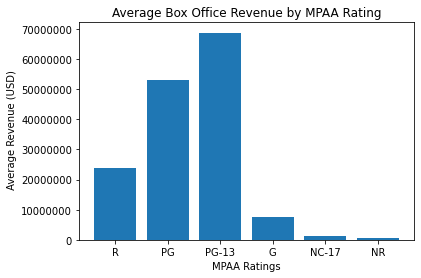

In [35]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict.keys(),ratings_dict.values() )



ax.set_title("Average Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel(" Average Revenue (USD)")

Text(0, 0.5, 'Median Revenue (USD)')

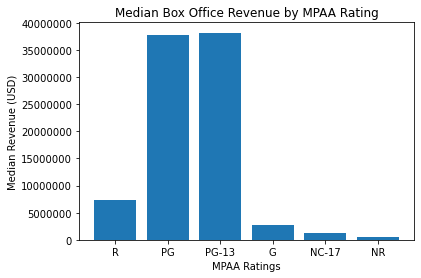

In [36]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict_med.keys(),ratings_dict_med.values() )



ax.set_title("Median Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel("Median Revenue (USD)")

In [16]:
action = movie_info[movie_info['genre'].str.contains('Action')]
action_rev=action['box_office'].mean()
action_med=action['box_office'].median()

In [17]:
drama = movie_info[movie_info['genre'].str.contains('Drama')]
drama_rev=drama['box_office'].mean()
drama_med=drama['box_office'].median()

In [18]:
comedy = movie_info[movie_info['genre'].str.contains('Comedy')]
comedy_rev=comedy['box_office'].mean()
comedy_med=comedy['box_office'].median()

In [19]:
horror = movie_info[movie_info['genre'].str.contains('Horror')]
horror_rev=horror['box_office'].mean()
horror_med=horror['box_office'].median()

In [20]:
romance = movie_info[movie_info['genre'].str.contains('Romance')]
romance_rev=romance['box_office'].mean()
romance_med=romance['box_office'].median()

In [21]:
top_genres_rev = {'action':action_rev,'drama':drama_rev,'comedy':comedy_rev,'horror':horror_rev,'romance':romance_rev}

Text(0, 0.5, 'Average Revenue (USD)')

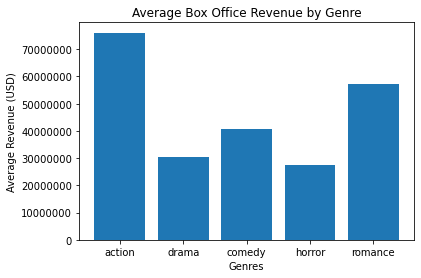

In [37]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_rev.keys(),top_genres_rev.values() )





ax.set_title("Average Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average Revenue (USD)")

In [23]:
top_genres_med = {'action':action_med,'drama':drama_med,'comedy':comedy_med,'horror':horror_med,'romance':romance_med}

Text(0, 0.5, 'Median Revenue (USD)')

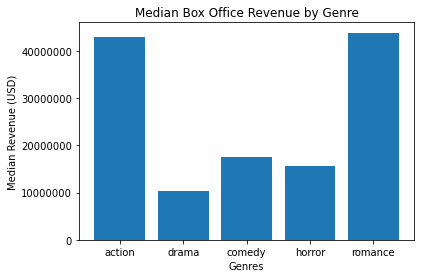

In [38]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_med.keys(),top_genres_med.values() )





ax.set_title("Median Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Median Revenue (USD)")

In [25]:
movie_info['box_office'].mean()

41958400.02127659

In [26]:
comedy['box_office'].mean()

40530545.931372546

In [27]:
comedy['box_office'].std()

54249600.41858846

In [28]:
pop=movie_info['box_office']
com=comedy['box_office']
act=action['box_office']
drm=drama['box_office']
hor=horror['box_office']

In [29]:
alpha = .05

In [30]:
stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

(-1.6448536269514729, 1.6448536269514722)

In [31]:
stats.ttest_ind(com,pop)

Ttest_indResult(statistic=-0.1999475067200022, pvalue=0.8416429540851095)

In [32]:
stats.ttest_ind(act,pop)

Ttest_indResult(statistic=3.2392189614205606, pvalue=0.0013430512162730568)

In [33]:
stats.ttest_ind(drm,pop)

Ttest_indResult(statistic=-1.8073438196319902, pvalue=0.07152964453222374)

In [34]:
stats.ttest_ind(rom,pop)

NameError: name 'rom' is not defined

In [ ]:
stats.ttest_ind(hor,pop)

In [ ]:
sorted_movie_info=movie_info.sort_values(by='box_office',ascending=False)
sorted_movie_info.head(10)

In [ ]:
##part 1 of creating csv out of sql table movie_basics
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM movie_basics
                               ''', conn)
sql_query

In [ ]:
##part 2 of creating csv out of sql table movie_basics
basics_df = pd.DataFrame(sql_query, columns = ['movie_id', 'primary_title', 'original_title','start_year','runtime_minutes','genres'])
basics_df

# Jake Umholtz 